# 📊 Phase 3A: Feature Engineering - Basic Transformations

---

## Objectives

1. ✅ Encode all binary features (Yes/No → 1/0)
2. ✅ Encode categorical features (Contract, Internet, Payment)
3. ✅ Handle "No service" categories properly
4. ✅ Create tenure bins based on Phase 2B danger zones
5. ✅ Create price segments based on Phase 2B insights
6. ✅ Transform TotalCharges (log, average)
7. ✅ Validate all transformations
8. ✅ Save clean encoded dataset

---

**Part of:** Feature Engineering (Phase 3)

**Prerequisites:** Phase 2A, 2B, 2C (EDA Complete)

**Next:** Phase 3B - Advanced Feature Engineering

---

## 1. Environment Setup

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Visualization styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Environment configured successfully!")

✅ Environment configured successfully!


## 2. Load Data

In [2]:
# Define paths
project_root = Path('/Users/mihiniboteju/churn-prediction-project')
data_path = project_root / 'data' / 'raw' / 'Telco-Customer-Churn.csv'
processed_path = project_root / 'data' / 'processed'
viz_path = project_root / 'visualizations' / 'figures'

# Create directories if they don't exist
processed_path.mkdir(parents=True, exist_ok=True)
viz_path.mkdir(parents=True, exist_ok=True)

# Load data
df = pd.read_csv(data_path)

# Apply TotalCharges fix from Phase 2A
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# Convert SeniorCitizen to match other binary features (for consistency)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print(f"📊 Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🎯 Churn rate: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.2f}%")
print(f"\n📋 Original features: {df.shape[1]}")

📊 Data loaded: 7,043 rows × 21 columns
💾 Memory usage: 7.76 MB
🎯 Churn rate: 26.54%

📋 Original features: 21


## 3. Data Overview Before Transformation

In [3]:
# Display data types
print("📊 DATA TYPES BEFORE TRANSFORMATION")
print("=" * 70)
print(df.dtypes.value_counts())
print("\n" + "=" * 70)

# Check for missing values
missing_count = df.isnull().sum().sum()
print(f"\n❓ Missing values: {missing_count}")

# Show first few rows
print("\n📋 Sample data:")
df.head()

📊 DATA TYPES BEFORE TRANSFORMATION
object     18
float64     2
int64       1
Name: count, dtype: int64


❓ Missing values: 0

📋 Sample data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4. Binary Feature Encoding

Transform all Yes/No features to 1/0 for machine learning models.

In [4]:
print("🔄 BINARY FEATURE ENCODING")
print("=" * 70)

# Create a copy to preserve original
df_encoded = df.copy()

# Binary features to encode
binary_features = {
    'gender': {'Male': 1, 'Female': 0},
    'SeniorCitizen': {'Yes': 1, 'No': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'Churn': {'Yes': 1, 'No': 0}  # Target variable
}

# Apply encoding
for feature, mapping in binary_features.items():
    original_counts = df_encoded[feature].value_counts()
    df_encoded[feature] = df_encoded[feature].map(mapping)
    
    print(f"\n✅ {feature}:")
    print(f"   Original: {original_counts.to_dict()}")
    print(f"   Encoded: {df_encoded[feature].value_counts().to_dict()}")

print("\n" + "=" * 70)
print(f"✅ Encoded {len(binary_features)} binary features")

🔄 BINARY FEATURE ENCODING

✅ gender:
   Original: {'Male': 3555, 'Female': 3488}
   Encoded: {1: 3555, 0: 3488}

✅ SeniorCitizen:
   Original: {'No': 5901, 'Yes': 1142}
   Encoded: {0: 5901, 1: 1142}

✅ Partner:
   Original: {'No': 3641, 'Yes': 3402}
   Encoded: {0: 3641, 1: 3402}

✅ Dependents:
   Original: {'No': 4933, 'Yes': 2110}
   Encoded: {0: 4933, 1: 2110}

✅ PhoneService:
   Original: {'Yes': 6361, 'No': 682}
   Encoded: {1: 6361, 0: 682}

✅ PaperlessBilling:
   Original: {'Yes': 4171, 'No': 2872}
   Encoded: {1: 4171, 0: 2872}

✅ Churn:
   Original: {'No': 5174, 'Yes': 1869}
   Encoded: {0: 5174, 1: 1869}

✅ Encoded 7 binary features


## 5. Contract Type Encoding

**From Phase 2C:** Contract is the #1 predictor (Cramér's V = 0.40)

Use ordinal encoding since there's a natural order: Month-to-month (highest risk) → One year → Two year (lowest risk)

In [5]:
print("📝 CONTRACT TYPE ENCODING")
print("=" * 70)

# Original distribution
print("Original Contract distribution:")
print(df_encoded['Contract'].value_counts())

# Ordinal encoding (commitment level)
contract_mapping = {
    'Month-to-month': 0,  # Lowest commitment
    'One year': 1,        # Medium commitment
    'Two year': 2         # Highest commitment
}

df_encoded['contract_encoded'] = df_encoded['Contract'].map(contract_mapping)

# Also create risk score (reversed - higher = more risk)
contract_risk_mapping = {
    'Month-to-month': 2,  # Highest risk
    'One year': 1,        # Medium risk
    'Two year': 0         # Lowest risk
}

df_encoded['contract_risk_score'] = df_encoded['Contract'].map(contract_risk_mapping)

print("\nEncoded values:")
print(df_encoded[['Contract', 'contract_encoded', 'contract_risk_score']].drop_duplicates().sort_values('contract_encoded'))

print("\n✅ Created 2 features: contract_encoded, contract_risk_score")

📝 CONTRACT TYPE ENCODING
Original Contract distribution:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Encoded values:
          Contract  contract_encoded  contract_risk_score
0   Month-to-month                 0                    2
1         One year                 1                    1
11        Two year                 2                    0

✅ Created 2 features: contract_encoded, contract_risk_score


## 6. Internet Service Encoding

**From Phase 2C:** Fiber optic = 42% churn (crisis!), DSL = 19%, No internet = 7%

Use one-hot encoding + create specific flags

In [6]:
print("🌐 INTERNET SERVICE ENCODING")
print("=" * 70)

# Original distribution
print("Original InternetService distribution:")
print(df_encoded['InternetService'].value_counts())

# Create binary flags
df_encoded['has_internet'] = (df_encoded['InternetService'] != 'No').astype(int)
df_encoded['is_fiber'] = (df_encoded['InternetService'] == 'Fiber optic').astype(int)
df_encoded['is_dsl'] = (df_encoded['InternetService'] == 'DSL').astype(int)
# Note: No internet is captured by has_internet=0

print("\nEncoded features:")
print(df_encoded[['InternetService', 'has_internet', 'is_fiber', 'is_dsl']].drop_duplicates())

print("\n✅ Created 3 features: has_internet, is_fiber, is_dsl")

🌐 INTERNET SERVICE ENCODING
Original InternetService distribution:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Encoded features:
   InternetService  has_internet  is_fiber  is_dsl
0              DSL             1         0       1
4      Fiber optic             1         1       0
11              No             0         0       0

✅ Created 3 features: has_internet, is_fiber, is_dsl


## 7. Payment Method Encoding

**From Phase 2C:** Electronic check = 45% churn, Auto-payment = 15-17% churn

Use one-hot encoding + create automated payment flag

In [7]:
print("💳 PAYMENT METHOD ENCODING")
print("=" * 70)

# Original distribution
print("Original PaymentMethod distribution:")
print(df_encoded['PaymentMethod'].value_counts())

# One-hot encoding
payment_dummies = pd.get_dummies(df_encoded['PaymentMethod'], prefix='payment')
df_encoded = pd.concat([df_encoded, payment_dummies], axis=1)

# Create automated payment flag
df_encoded['is_auto_payment'] = df_encoded['PaymentMethod'].isin([
    'Bank transfer (automatic)',
    'Credit card (automatic)'
]).astype(int)

# High-risk payment flag
df_encoded['is_electronic_check'] = (df_encoded['PaymentMethod'] == 'Electronic check').astype(int)

print("\nCreated payment dummy columns:")
print([col for col in payment_dummies.columns])

print("\nCreated flag features:")
print(df_encoded[['PaymentMethod', 'is_auto_payment', 'is_electronic_check']].drop_duplicates())

print(f"\n✅ Created {len(payment_dummies.columns) + 2} features: {len(payment_dummies.columns)} dummies + 2 flags")

💳 PAYMENT METHOD ENCODING
Original PaymentMethod distribution:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Created payment dummy columns:
['payment_Bank transfer (automatic)', 'payment_Credit card (automatic)', 'payment_Electronic check', 'payment_Mailed check']

Created flag features:
               PaymentMethod  is_auto_payment  is_electronic_check
0           Electronic check                0                    1
1               Mailed check                0                    0
3  Bank transfer (automatic)                1                    0
6    Credit card (automatic)                1                    0

✅ Created 6 features: 4 dummies + 2 flags


## 8. Add-On Services Encoding

Handle services with "No internet service" category → convert to binary (Yes=1, No/No internet service=0)

In [8]:
print("🛡️  ADD-ON SERVICES ENCODING")
print("=" * 70)

# Services that have "No internet service" category
addon_services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

print("Encoding add-on services:")
for service in addon_services:
    # Show original categories
    original_counts = df_encoded[service].value_counts()
    
    # Binary encoding: Yes=1, No/No internet service=0
    df_encoded[f'{service}_binary'] = (df_encoded[service] == 'Yes').astype(int)
    
    encoded_counts = df_encoded[f'{service}_binary'].value_counts()
    
    print(f"\n  {service}:")
    print(f"    Original: {dict(original_counts)}")
    print(f"    Encoded ({service}_binary): {dict(encoded_counts)}")

print("\n" + "=" * 70)
print(f"✅ Created {len(addon_services)} binary features for add-on services")

🛡️  ADD-ON SERVICES ENCODING
Encoding add-on services:

  OnlineSecurity:
    Original: {'No': 3498, 'Yes': 2019, 'No internet service': 1526}
    Encoded (OnlineSecurity_binary): {0: 5024, 1: 2019}

  OnlineBackup:
    Original: {'No': 3088, 'Yes': 2429, 'No internet service': 1526}
    Encoded (OnlineBackup_binary): {0: 4614, 1: 2429}

  DeviceProtection:
    Original: {'No': 3095, 'Yes': 2422, 'No internet service': 1526}
    Encoded (DeviceProtection_binary): {0: 4621, 1: 2422}

  TechSupport:
    Original: {'No': 3473, 'Yes': 2044, 'No internet service': 1526}
    Encoded (TechSupport_binary): {0: 4999, 1: 2044}

  StreamingTV:
    Original: {'No': 2810, 'Yes': 2707, 'No internet service': 1526}
    Encoded (StreamingTV_binary): {0: 4336, 1: 2707}

  StreamingMovies:
    Original: {'No': 2785, 'Yes': 2732, 'No internet service': 1526}
    Encoded (StreamingMovies_binary): {0: 4311, 1: 2732}

✅ Created 6 binary features for add-on services


## 9. Multiple Lines Encoding

Handle "No phone service" category

In [9]:
print("📞 MULTIPLE LINES ENCODING")
print("=" * 70)

# Original distribution
print("Original MultipleLines distribution:")
print(df_encoded['MultipleLines'].value_counts())

# Binary encoding: Yes=1, No/No phone service=0
df_encoded['MultipleLines_binary'] = (df_encoded['MultipleLines'] == 'Yes').astype(int)

print("\nEncoded MultipleLines_binary:")
print(df_encoded['MultipleLines_binary'].value_counts())

print("\n✅ Created 1 feature: MultipleLines_binary")

📞 MULTIPLE LINES ENCODING
Original MultipleLines distribution:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Encoded MultipleLines_binary:
MultipleLines_binary
0    4072
1    2971
Name: count, dtype: int64

✅ Created 1 feature: MultipleLines_binary


## 10. Tenure Feature Engineering

**From Phase 2B:** Clear danger zones identified:
- 0-12 months: 50%+ churn (DANGER ZONE)
- 13-24 months: ~35% churn
- 25-36 months: ~25% churn
- 37+ months: ~15% churn

In [10]:
print("⏰ TENURE FEATURE ENGINEERING")
print("=" * 70)

# Tenure statistics
print("Tenure statistics:")
print(df_encoded['tenure'].describe())

# Create tenure bins based on Phase 2B insights
df_encoded['tenure_group'] = pd.cut(
    df_encoded['tenure'],
    bins=[0, 12, 24, 36, 72],
    labels=['0-12m', '13-24m', '25-36m', '37m+'],
    include_lowest=True
)

# Ordinal encoding for tenure groups
tenure_group_mapping = {
    '0-12m': 0,
    '13-24m': 1,
    '25-36m': 2,
    '37m+': 3
}
df_encoded['tenure_group_encoded'] = df_encoded['tenure_group'].astype(str).map(tenure_group_mapping)

# Binary flag: Is new customer (danger zone)
df_encoded['is_new_customer'] = (df_encoded['tenure'] <= 12).astype(int)

print("\nTenure group distribution:")
print(df_encoded['tenure_group'].value_counts().sort_index())

print("\nNew customer distribution:")
print(f"  New customers (≤12 months): {df_encoded['is_new_customer'].sum():,} ({df_encoded['is_new_customer'].mean()*100:.1f}%)")
print(f"  Established customers (>12 months): {(1-df_encoded['is_new_customer']).sum():,} ({(1-df_encoded['is_new_customer']).mean()*100:.1f}%)")

print("\n✅ Created 3 features: tenure_group, tenure_group_encoded, is_new_customer")

⏰ TENURE FEATURE ENGINEERING
Tenure statistics:
count    7043.00
mean       32.37
std        24.56
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: tenure, dtype: float64

Tenure group distribution:
tenure_group
0-12m     2186
13-24m    1024
25-36m     832
37m+      3001
Name: count, dtype: int64

New customer distribution:
  New customers (≤12 months): 2,186 (31.0%)
  Established customers (>12 months): 4,857 (69.0%)

✅ Created 3 features: tenure_group, tenure_group_encoded, is_new_customer


## 11. Monthly Charges Feature Engineering

**From Phase 2B:** $70 threshold identified (median split), price sensitivity patterns

In [11]:
print("💰 MONTHLY CHARGES FEATURE ENGINEERING")
print("=" * 70)

# Monthly charges statistics
print("MonthlyCharges statistics:")
print(df_encoded['MonthlyCharges'].describe())

# Create price segments
df_encoded['price_segment'] = pd.cut(
    df_encoded['MonthlyCharges'],
    bins=[0, 35, 70, 105, 120],
    labels=['low', 'medium', 'high', 'premium'],
    include_lowest=True
)

# Ordinal encoding for price segments
price_segment_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'premium': 3
}
df_encoded['price_segment_encoded'] = df_encoded['price_segment'].astype(str).map(price_segment_mapping)

# Binary flag: High price (>$70 from Phase 2B)
df_encoded['is_high_price'] = (df_encoded['MonthlyCharges'] > 70).astype(int)

print("\nPrice segment distribution:")
print(df_encoded['price_segment'].value_counts().sort_index())

print("\nHigh price distribution:")
print(f"  High price (>$70): {df_encoded['is_high_price'].sum():,} ({df_encoded['is_high_price'].mean()*100:.1f}%)")
print(f"  Low/Medium price (≤$70): {(1-df_encoded['is_high_price']).sum():,} ({(1-df_encoded['is_high_price']).mean()*100:.1f}%)")

print("\n✅ Created 3 features: price_segment, price_segment_encoded, is_high_price")

💰 MONTHLY CHARGES FEATURE ENGINEERING
MonthlyCharges statistics:
count    7043.00
mean       64.76
std        30.09
min        18.25
25%        35.50
50%        70.35
75%        89.85
max       118.75
Name: MonthlyCharges, dtype: float64

Price segment distribution:
price_segment
low        1735
medium     1725
high       3065
premium     518
Name: count, dtype: int64

High price distribution:
  High price (>$70): 3,583 (50.9%)
  Low/Medium price (≤$70): 3,460 (49.1%)

✅ Created 3 features: price_segment, price_segment_encoded, is_high_price


## 12. Total Charges Feature Engineering

Transform TotalCharges to handle skewness and create meaningful derived features

In [13]:
print("💵 TOTAL CHARGES FEATURE ENGINEERING")
print("=" * 70)

# Total charges statistics
print("TotalCharges statistics:")
print(df_encoded['TotalCharges'].describe())

# Log transformation (handles right-skewed distribution)
df_encoded['TotalCharges_log'] = np.log1p(df_encoded['TotalCharges'])

# Average monthly spend (total charges divided by tenure)
# Add 1 to tenure to avoid division by zero
df_encoded['avg_monthly_spend'] = df_encoded['TotalCharges'] / (df_encoded['tenure'] + 1)

print("\nTotalCharges_log statistics:")
print(df_encoded['TotalCharges_log'].describe())

print("\navg_monthly_spend statistics:")
print(df_encoded['avg_monthly_spend'].describe())

print("\n✅ Created 2 features: TotalCharges_log, avg_monthly_spend")

💵 TOTAL CHARGES FEATURE ENGINEERING
TotalCharges statistics:
count    7043.00
mean     2279.73
std      2266.79
min         0.00
25%       398.55
50%      1394.55
75%      3786.60
max      8684.80
Name: TotalCharges, dtype: float64

TotalCharges_log statistics:
count    7043.00
mean        6.93
std         1.57
min         0.00
25%         5.99
50%         7.24
75%         8.24
max         9.07
Name: TotalCharges_log, dtype: float64

avg_monthly_spend statistics:
count    7043.00
mean       58.99
std        30.58
min         0.00
25%        26.04
50%        60.94
75%        84.83
max       118.97
Name: avg_monthly_spend, dtype: float64

✅ Created 2 features: TotalCharges_log, avg_monthly_spend


## 13. Feature Summary & Validation

In [14]:
print("📊 FEATURE ENGINEERING SUMMARY - PHASE 3A")
print("=" * 70)

# Count new features created
original_features = df.columns.tolist()
new_features = [col for col in df_encoded.columns if col not in original_features]

print(f"\n✅ Original features: {len(original_features)}")
print(f"✅ New features created: {len(new_features)}")
print(f"✅ Total features: {len(df_encoded.columns)}")

print("\n📋 NEW FEATURES CREATED:")
print("=" * 70)

feature_categories = {
    'Contract Encoding (2)': ['contract_encoded', 'contract_risk_score'],
    'Internet Service (3)': ['has_internet', 'is_fiber', 'is_dsl'],
    'Payment Method (6)': [col for col in new_features if col.startswith('payment_')] + ['is_auto_payment', 'is_electronic_check'],
    'Add-On Services (6)': [col for col in new_features if col.endswith('_binary') and col not in ['MultipleLines_binary']],
    'Multiple Lines (1)': ['MultipleLines_binary'],
    'Tenure Features (3)': ['tenure_group', 'tenure_group_encoded', 'is_new_customer'],
    'Price Features (3)': ['price_segment', 'price_segment_encoded', 'is_high_price'],
    'TotalCharges (2)': ['TotalCharges_log', 'avg_monthly_spend']
}

for category, features in feature_categories.items():
    actual_features = [f for f in features if f in new_features]
    print(f"\n{category}:")
    for feat in actual_features:
        print(f"  ✓ {feat}")

📊 FEATURE ENGINEERING SUMMARY - PHASE 3A

✅ Original features: 21
✅ New features created: 26
✅ Total features: 47

📋 NEW FEATURES CREATED:

Contract Encoding (2):
  ✓ contract_encoded
  ✓ contract_risk_score

Internet Service (3):
  ✓ has_internet
  ✓ is_fiber
  ✓ is_dsl

Payment Method (6):
  ✓ payment_Bank transfer (automatic)
  ✓ payment_Credit card (automatic)
  ✓ payment_Electronic check
  ✓ payment_Mailed check
  ✓ is_auto_payment
  ✓ is_electronic_check

Add-On Services (6):
  ✓ OnlineSecurity_binary
  ✓ OnlineBackup_binary
  ✓ DeviceProtection_binary
  ✓ TechSupport_binary
  ✓ StreamingTV_binary
  ✓ StreamingMovies_binary

Multiple Lines (1):
  ✓ MultipleLines_binary

Tenure Features (3):
  ✓ tenure_group
  ✓ tenure_group_encoded
  ✓ is_new_customer

Price Features (3):
  ✓ price_segment
  ✓ price_segment_encoded
  ✓ is_high_price

TotalCharges (2):
  ✓ TotalCharges_log
  ✓ avg_monthly_spend


## 14. Data Quality Checks

In [15]:
print("🔍 DATA QUALITY CHECKS")
print("=" * 70)

# Check for missing values
missing_values = df_encoded.isnull().sum()
if missing_values.sum() == 0:
    print("\n✅ No missing values detected!")
else:
    print("\n⚠️  Missing values found:")
    print(missing_values[missing_values > 0])

# Check data types
print("\n📊 Data type distribution:")
print(df_encoded.dtypes.value_counts())

# Verify binary encodings (should only have 0 and 1)
binary_encoded_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'PaperlessBilling', 'Churn',
    'has_internet', 'is_fiber', 'is_dsl',
    'is_auto_payment', 'is_electronic_check',
    'is_new_customer', 'is_high_price'
] + [col for col in df_encoded.columns if col.endswith('_binary')]

print("\n✅ Verifying binary features (should only contain 0 and 1):")
binary_check_passed = True
for feature in binary_encoded_features:
    if feature in df_encoded.columns:
        unique_values = df_encoded[feature].unique()
        if not set(unique_values).issubset({0, 1}):
            print(f"  ⚠️  {feature}: {unique_values} (ISSUE!)")
            binary_check_passed = False

if binary_check_passed:
    print("  ✓ All binary features verified!")

# Verify ordinal encodings
print("\n✅ Verifying ordinal features:")
ordinal_features = {
    'contract_encoded': [0, 1, 2],
    'contract_risk_score': [0, 1, 2],
    'tenure_group_encoded': [0, 1, 2, 3],
    'price_segment_encoded': [0, 1, 2, 3]
}

for feature, expected_values in ordinal_features.items():
    actual_values = sorted(df_encoded[feature].unique())
    if actual_values == expected_values:
        print(f"  ✓ {feature}: {actual_values}")
    else:
        print(f"  ⚠️  {feature}: Expected {expected_values}, got {actual_values}")

print("\n" + "=" * 70)
print("✅ Data quality validation complete!")

🔍 DATA QUALITY CHECKS

✅ No missing values detected!

📊 Data type distribution:
int64       26
object      11
float64      4
bool         4
category     1
category     1
Name: count, dtype: int64

✅ Verifying binary features (should only contain 0 and 1):
  ✓ All binary features verified!

✅ Verifying ordinal features:
  ✓ contract_encoded: [0, 1, 2]
  ✓ contract_risk_score: [0, 1, 2]
  ✓ tenure_group_encoded: [0, 1, 2, 3]
  ✓ price_segment_encoded: [0, 1, 2, 3]

✅ Data quality validation complete!


## 15. Visualization: Feature Distributions

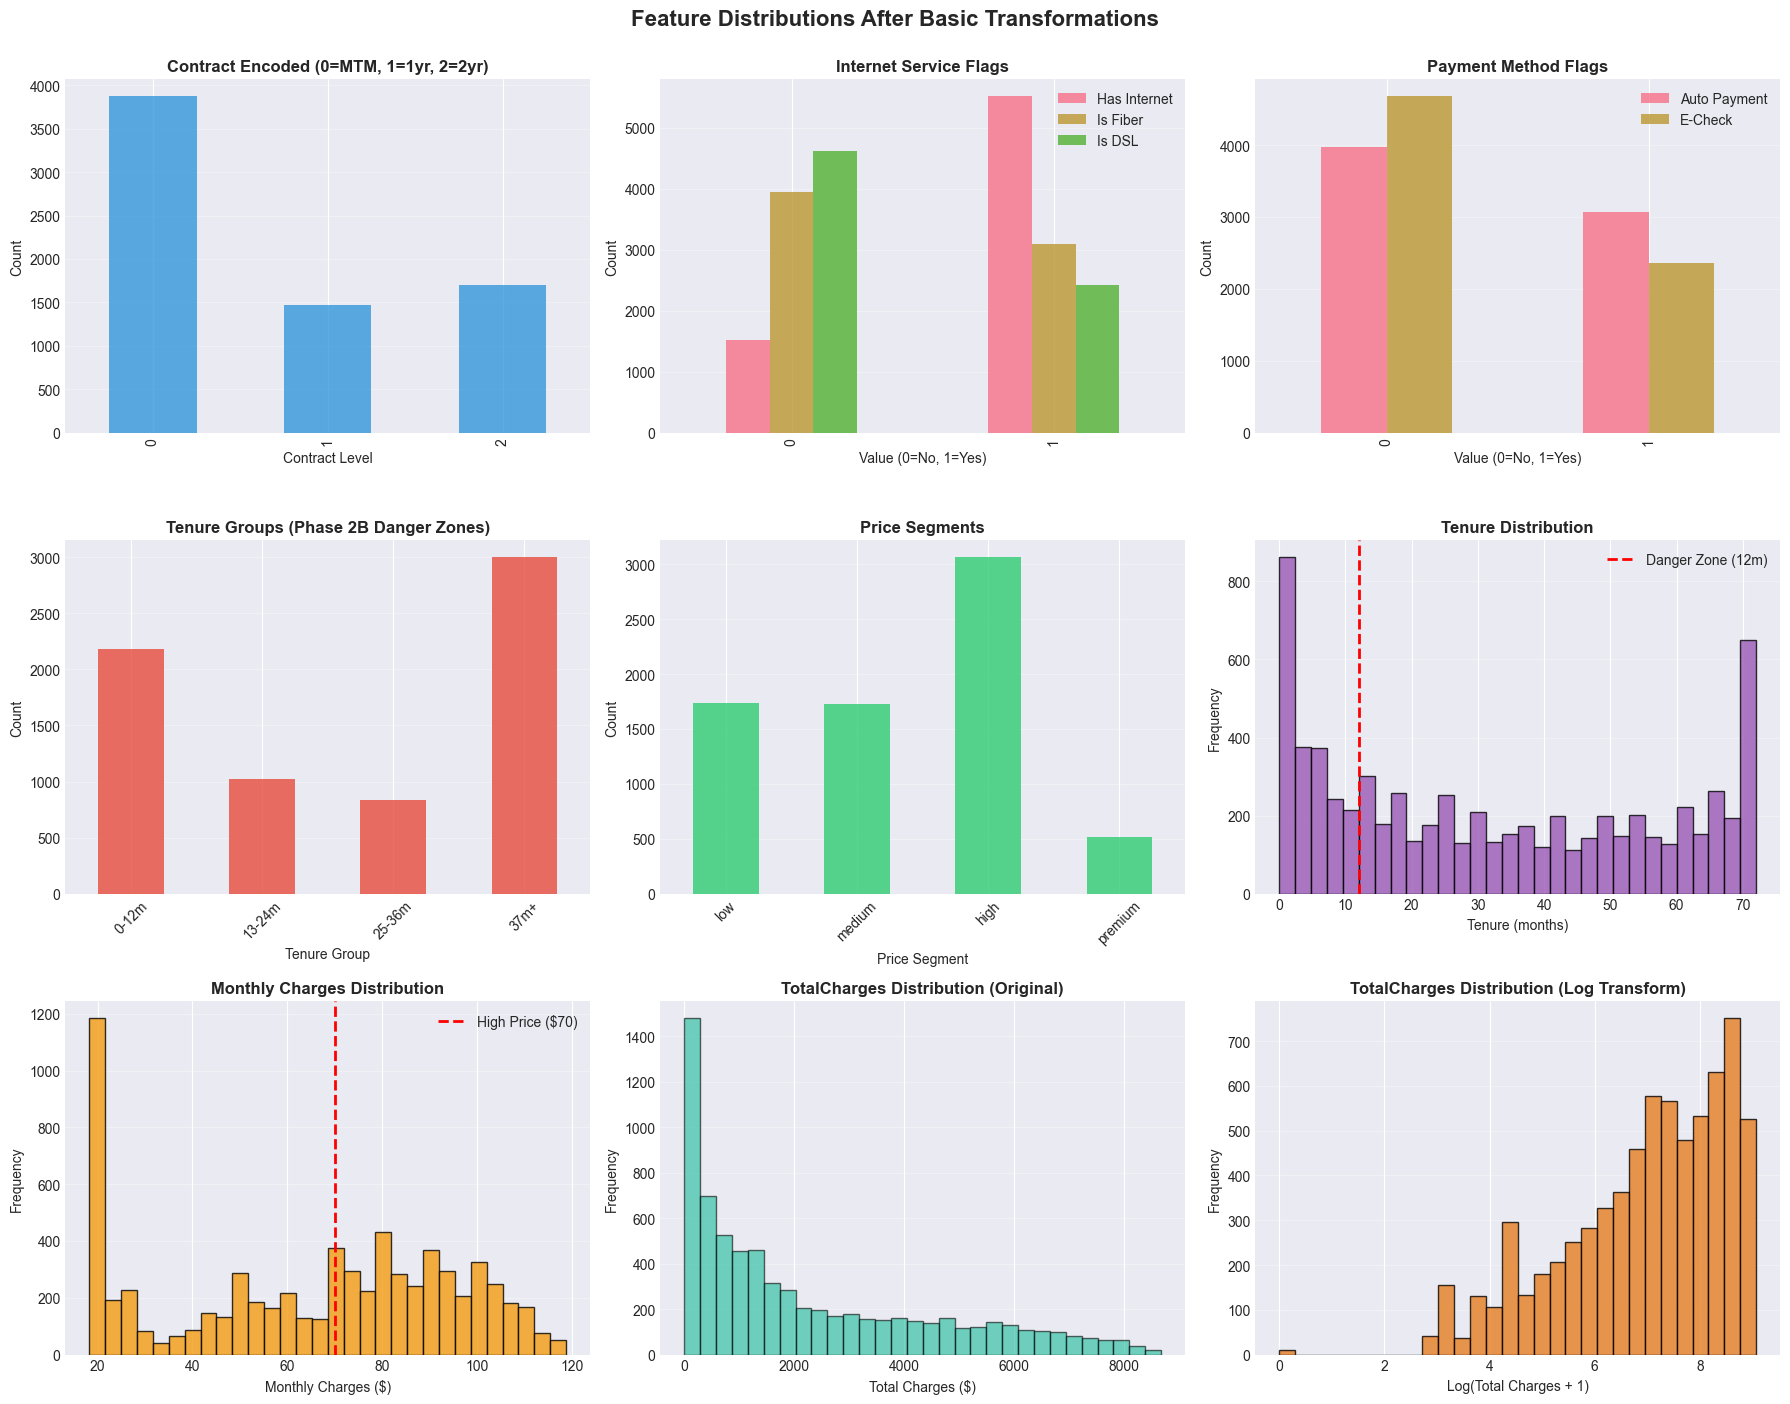

✅ Saved: /Users/mihiniboteju/churn-prediction-project/visualizations/figures/15_basic_feature_distributions.png


In [16]:
# Visualization: Compare distributions before and after encoding
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Feature Distributions After Basic Transformations', fontsize=16, fontweight='bold', y=1.00)

# 1. Contract encoding
df_encoded['contract_encoded'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='#3498db', alpha=0.8)
axes[0, 0].set_title('Contract Encoded (0=MTM, 1=1yr, 2=2yr)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Contract Level')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(alpha=0.3, axis='y')

# 2. Internet service flags
internet_counts = pd.DataFrame({
    'Has Internet': df_encoded['has_internet'].value_counts(),
    'Is Fiber': df_encoded['is_fiber'].value_counts(),
    'Is DSL': df_encoded['is_dsl'].value_counts()
})
internet_counts.plot(kind='bar', ax=axes[0, 1], alpha=0.8)
axes[0, 1].set_title('Internet Service Flags', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Value (0=No, 1=Yes)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Payment flags
payment_counts = pd.DataFrame({
    'Auto Payment': df_encoded['is_auto_payment'].value_counts(),
    'E-Check': df_encoded['is_electronic_check'].value_counts()
})
payment_counts.plot(kind='bar', ax=axes[0, 2], alpha=0.8)
axes[0, 2].set_title('Payment Method Flags', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Value (0=No, 1=Yes)')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3, axis='y')

# 4. Tenure groups
df_encoded['tenure_group'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='#e74c3c', alpha=0.8)
axes[1, 0].set_title('Tenure Groups (Phase 2B Danger Zones)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tenure Group')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Price segments
df_encoded['price_segment'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='#2ecc71', alpha=0.8)
axes[1, 1].set_title('Price Segments', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Price Segment')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Tenure distribution (histogram)
axes[1, 2].hist(df_encoded['tenure'], bins=30, color='#9b59b6', alpha=0.8, edgecolor='black')
axes[1, 2].axvline(x=12, color='red', linestyle='--', linewidth=2, label='Danger Zone (12m)')
axes[1, 2].set_title('Tenure Distribution', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Tenure (months)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3, axis='y')

# 7. Monthly Charges distribution
axes[2, 0].hist(df_encoded['MonthlyCharges'], bins=30, color='#f39c12', alpha=0.8, edgecolor='black')
axes[2, 0].axvline(x=70, color='red', linestyle='--', linewidth=2, label='High Price ($70)')
axes[2, 0].set_title('Monthly Charges Distribution', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Monthly Charges ($)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()
axes[2, 0].grid(alpha=0.3, axis='y')

# 8. TotalCharges before and after log transformation
axes[2, 1].hist(df_encoded['TotalCharges'], bins=30, color='#1abc9c', alpha=0.6, label='Original', edgecolor='black')
axes[2, 1].set_title('TotalCharges Distribution (Original)', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Total Charges ($)')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].grid(alpha=0.3, axis='y')

# 9. Log-transformed TotalCharges
axes[2, 2].hist(df_encoded['TotalCharges_log'], bins=30, color='#e67e22', alpha=0.8, edgecolor='black')
axes[2, 2].set_title('TotalCharges Distribution (Log Transform)', fontsize=12, fontweight='bold')
axes[2, 2].set_xlabel('Log(Total Charges + 1)')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(viz_path / '15_basic_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Saved: {viz_path / '15_basic_feature_distributions.png'}")

## 16. Save Encoded Dataset

In [17]:
print("💾 SAVING ENCODED DATASET")
print("=" * 70)

# Save the encoded dataset
output_file = processed_path / 'features_basic_encoded.csv'
df_encoded.to_csv(output_file, index=False)

print(f"\n✅ Saved encoded dataset to: {output_file}")
print(f"📊 Dataset shape: {df_encoded.shape[0]:,} rows × {df_encoded.shape[1]} columns")
print(f"💾 File size: {output_file.stat().st_size / 1024**2:.2f} MB")

# Create feature metadata
feature_metadata = []

for col in df_encoded.columns:
    if col not in original_features:
        feature_metadata.append({
            'feature_name': col,
            'feature_type': 'encoded',
            'data_type': str(df_encoded[col].dtype),
            'unique_values': df_encoded[col].nunique(),
            'missing_values': df_encoded[col].isnull().sum(),
            'phase': '3A'
        })

metadata_df = pd.DataFrame(feature_metadata)
metadata_file = processed_path / 'phase3a_feature_metadata.csv'
metadata_df.to_csv(metadata_file, index=False)

print(f"✅ Saved feature metadata to: {metadata_file}")
print(f"\n📋 Metadata summary:")
print(metadata_df.head(10))

💾 SAVING ENCODED DATASET

✅ Saved encoded dataset to: /Users/mihiniboteju/churn-prediction-project/data/processed/features_basic_encoded.csv
📊 Dataset shape: 7,043 rows × 47 columns
💾 File size: 1.54 MB
✅ Saved feature metadata to: /Users/mihiniboteju/churn-prediction-project/data/processed/phase3a_feature_metadata.csv

📋 Metadata summary:
                        feature_name feature_type data_type  unique_values  \
0                   contract_encoded      encoded     int64              3   
1                contract_risk_score      encoded     int64              3   
2                       has_internet      encoded     int64              2   
3                           is_fiber      encoded     int64              2   
4                             is_dsl      encoded     int64              2   
5  payment_Bank transfer (automatic)      encoded      bool              2   
6    payment_Credit card (automatic)      encoded      bool              2   
7           payment_Electronic che

## 17. Phase 3A Summary

In [18]:
print("\n" + "="*80)
print("📊 PHASE 3A: BASIC FEATURE TRANSFORMATIONS - COMPLETE ✅")
print("="*80)

summary = f"""
🎯 OBJECTIVES COMPLETED:
  ✅ Encoded all binary features (7 features)
  ✅ Encoded Contract type (2 features: encoded + risk score)
  ✅ Encoded Internet Service (3 features: has_internet, is_fiber, is_dsl)
  ✅ Encoded Payment Method (6 features: 4 dummies + 2 flags)
  ✅ Encoded Add-On Services (6 binary features)
  ✅ Encoded Multiple Lines (1 binary feature)
  ✅ Created Tenure features (3 features: group, encoded, is_new)
  ✅ Created Price features (3 features: segment, encoded, is_high)
  ✅ Transformed TotalCharges (2 features: log, avg_monthly_spend)

📈 FEATURE COUNT:
  • Original features: {len(original_features)}
  • New features created: {len(new_features)}
  • Total features: {len(df_encoded.columns)}

✅ DATA QUALITY:
  • Missing values: {df_encoded.isnull().sum().sum()}
  • All binary features validated (0/1 only)
  • All ordinal features validated
  • Dataset shape: {df_encoded.shape[0]:,} rows × {df_encoded.shape[1]} columns

💾 DELIVERABLES:
  ✅ features_basic_encoded.csv ({df_encoded.shape[0]:,} × {df_encoded.shape[1]})
  ✅ phase3a_feature_metadata.csv ({len(metadata_df)} features documented)
  ✅ 15_basic_feature_distributions.png (visualization)

🚀 READY FOR:
  → Phase 3B: Advanced Feature Engineering
    • Service count features
    • Security bundle features
    • Family features
    • Interaction terms
    • Customer lifetime value

📊 KEY INSIGHTS FROM ENCODING:
  • {df_encoded['is_new_customer'].mean()*100:.1f}% of customers are in danger zone (≤12 months)
  • {df_encoded['is_high_price'].mean()*100:.1f}% of customers pay >$70/month
  • {df_encoded['is_fiber'].mean()*100:.1f}% have fiber optic (42% churn in Phase 2C!)
  • {df_encoded['is_auto_payment'].mean()*100:.1f}% use automated payment
  • {df_encoded[df_encoded['contract_risk_score']==2].shape[0]} customers on month-to-month (highest risk)
"""

print(summary)
print("="*80)
print("✅ Phase 3A Complete! Ready for Phase 3B.")
print("="*80)


📊 PHASE 3A: BASIC FEATURE TRANSFORMATIONS - COMPLETE ✅

🎯 OBJECTIVES COMPLETED:
  ✅ Encoded all binary features (7 features)
  ✅ Encoded Contract type (2 features: encoded + risk score)
  ✅ Encoded Internet Service (3 features: has_internet, is_fiber, is_dsl)
  ✅ Encoded Payment Method (6 features: 4 dummies + 2 flags)
  ✅ Encoded Add-On Services (6 binary features)
  ✅ Encoded Multiple Lines (1 binary feature)
  ✅ Created Tenure features (3 features: group, encoded, is_new)
  ✅ Created Price features (3 features: segment, encoded, is_high)
  ✅ Transformed TotalCharges (2 features: log, avg_monthly_spend)

📈 FEATURE COUNT:
  • Original features: 21
  • New features created: 26
  • Total features: 47

✅ DATA QUALITY:
  • Missing values: 0
  • All binary features validated (0/1 only)
  • All ordinal features validated
  • Dataset shape: 7,043 rows × 47 columns

💾 DELIVERABLES:
  ✅ features_basic_encoded.csv (7,043 × 47)
  ✅ phase3a_feature_metadata.csv (26 features documented)
  ✅ 15_ba